In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset file
data = pd.read_csv('UNSW_NB15_no_outliers.csv')

# Assuming you already have a subset of selected features in a list called 'selected_features'
selected_features = ['rate', 'dttl', 'dload', 'swin', 'dwin', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_dst_src_ltm', 'ct_srv_dst']  # Example list of selected features

X = data[selected_features]  # Features
y = data['label']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Feature scaling for better performance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize the SVM classifier
base_classifier = SVC(kernel='linear', random_state=42)

# Initialize the Bagging classifier with SVM as the base estimator
ensemble_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Train the ensemble classifier
ensemble_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = ensemble_classifier.predict(X_test)
print("SVM AND BAGGING")
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)


Shape of X_train: (9086, 10)
Shape of X_test: (2272, 10)
Shape of y_train: (9086,)
Shape of y_test: (2272,)
SVM AND BAGGING
Accuracy: 0.8776408450704225
Precision: 0.8806941766058681
Recall: 0.8776408450704225
F1-score: 0.8776631271685158


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset file
data = pd.read_csv('UNSW_NB15_no_outliers.csv')

# Assuming you already have a subset of selected features in a list called 'selected_features'
selected_features = ['rate', 'dttl', 'dload', 'swin', 'dwin', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_dst_src_ltm', 'ct_srv_dst']  # Example list of selected features

X = data[selected_features]  # Features
y = data['label']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Feature scaling for better performance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize the base SVM classifier
base_classifier = SVC(kernel='linear', random_state=42)

# Initialize the AdaBoost classifier with SVM as the base estimator
ensemble_classifier = AdaBoostClassifier(base_classifier, n_estimators=10, algorithm='SAMME', random_state=42)

# Train the ensemble classifier
ensemble_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = ensemble_classifier.predict(X_test)
print("SVM AND BOOSTING")
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)


Shape of X_train: (9086, 10)
Shape of X_test: (2272, 10)
Shape of y_train: (9086,)
Shape of y_test: (2272,)
SVM AND BOOSTING
Accuracy: 0.6883802816901409
Precision: 0.7510442557304613
Recall: 0.6883802816901409
F1-score: 0.6731087533570663


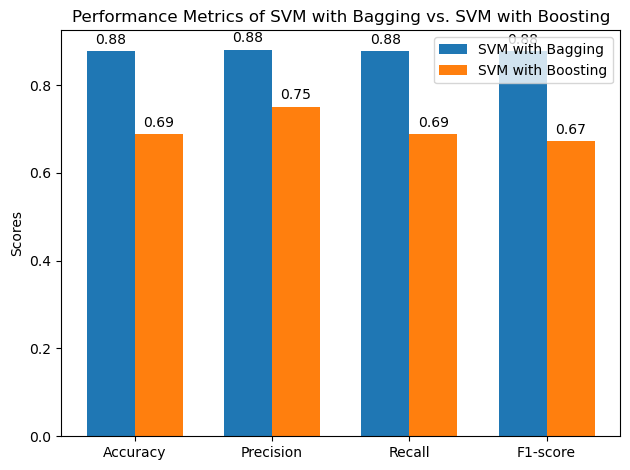

In [6]:
import matplotlib.pyplot as plt

# Define the metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
bagging_values = [0.8776408450704225, 0.8806941766058681, 0.8776408450704225, 0.8776631271685158]
boosting_values = [0.6883802816901409, 0.7510442557304613, 0.6883802816901409, 0.6731087533570663]

# Create a bar plot
x = range(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, bagging_values, width, label='SVM with Bagging')
rects2 = ax.bar([i + width for i in x], boosting_values, width, label='SVM with Boosting')

# Add labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics of SVM with Bagging vs. SVM with Boosting')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()
